# Store Inventory Object

In this project, we want to build an inventory, such as we might find at a store. There are two key objects that we'll need here

<b>Products:</b>
<ul>
<li> Each item is a product object, containing: </li>
    <ul>
    <li> A unique id number </li>
    <li> A product name </li>
    <li> A category </li>
    <li> A subcategory </li>
    <li> The URL of an image</li>
    <li> The URL of the product </li>
    <li> A rating (0-5) </li>
    <li> The number of reviews that constituted the rating </li>
    <li> A regular price </li>
    <li> A sale price </li>
    </ul>
<li> Products should have several methods, including: </li>
    <ul>
    <li> A __str__ function that prints the product in a nice format, displaying: </li>
        <ul>
        <li> The product name </li>
        <li> The image </li>
        <li> The product rating </li>
        <li> The product price </li>
        </ul>
    <li> A method to set the discount price - that can accept either a price or a percentage discount as an argument and calculate a new discount price from the actual price </li>
    <li> A method to add a rating to a product </li>
    </ul>
</ul>

<b>Inventory:</b>
<ul>
<li> Each inventory object should keep track of all the products along with a stock level. </li>
<li> The inventory should include methods such as:</li>
    <ul>
    <li> A method to add a new product to the inventory </li>
    <li> A method to remove a product from the inventory </li>
    <li> A method to print all the products in a category in a nice format </li>
    <li> A method to use the + sign to add two inventories together </li>
    <li> A method to get the Top X highest rated products </li>
    <li> A method to change the stock levels for any item in that inventory </li>
    <li> An overload of the length method, to return the number of items in the inventory </li>
    </ul>
</ul>

In [1]:
class myProduct():
    
    '''
    Class of Product objects with instance variables:
    prod_id, prod_name, category, subcategory, img_url, prod_url, price, rating, num_reviews, and discount_price.
    Class also has methods to set and get some of the instance variables
    Overloaded methods include __str__, __eq__ and __lt__
    One other instance method is the displayImage method to display the product image from a url
    
    '''
    # Initialize the product object instance
    def __init__ (self, prod_name, catg, subcatg,  price, prod_id=0):
       self.prod_id = prod_id
       self.prod_name = prod_name
       self.category = catg
       self.subcategory = subcatg
       self.img_url = 0
       self.prod_url = 0
       self.price = price
       self.rating = 0
       self.num_reviews = 0
       self.discount_price = 0

    # The string method calls the displayImage method to display product image as part of the print product call
    def __str__(self):
        ret_str = ('Product name:  {} \nProduct price:  {}\nProduct rating:  {}'.format(self.prod_name, self.price, self.rating))
        self.displayImage(self.img_url)
        return ret_str  
    #Equality is defined for two product objects if they have thesame product ID, name, and price
    def __eq__(self, other):     
        if (self.prod_id == other.prod_id) and (self.prod_name == other.prod_name) and (self.price == other.price):
            return True
        else:
            return False
    #The less than finction is overloaded to test if the rating of a product is less than the rating of another product
    def __lt__(self, other):
        if self.rating < other.rating:
            return self.rating < other.rating      
        elif self.rating == other.rating:
            return self.num_reviews < other.num_reviews     
    
    #displayImage method uses the PIL library
    def displayImage(self,url):
        from PIL import Image
        import requests
        try:
            im = Image.open(requests.get(url, stream=True).raw)
            display(im)
        except:
            print('Product image not available')

    def setDiscount (self, disc_price =0, disc_percent = 0):
        if disc_price != 0:
            self.discount_price = disc_price
        else:
            self.sale_price = self.price - (self.price *disc_percent/100)
    def getDiscount (self):
        return self.discount_price
    def setRating (self, rating = 0, num_reviews = 0):
        import math
        try: #Exception handling to ensure rating variable contains numeric characters
            float(rating)
            if math.isnan(rating): # This is done to handle instances where there is a null/Not a Number value for rating
                self.rating = 0
            elif rating < 0:
                self.rating = 0
            elif rating >5:
                self.rating = 5
            else: 
                self.rating = rating
                self.num_reviews = num_reviews
        except:
            self.rating = 0
            self.num_reviews = 0
    def getRating (self):
        return self.rating
    def setPrice(self, price):
        self.price = price
    def getPrice(self):
        return self.price    
    def getProdName(self):
        return self.prod_name
    def getCategory(self):
        return self.category
    def getSubcategory(self):
        return self.subcategory
    def setProdurl(self, prod_url):
        self.prod_url = prod_url
    def getProdurl(self):
        return self.prod_url
    def setImageurl (self, img_url):
        self.img_url = img_url
    def getImageurl(self):
        return self.img_url
    def setProdID(self, prod_id):
        self.prod_id = prod_id
    def getProdID (self):
        return self.prod_id

In [65]:
class myInventory():
    '''
    
    This is an inventory class that holds different products and their quantity in inventory
    Instance variables are a list container for all products in inventory and a list container for corresponding 
    product quanitity
    Instance methods include:
    addProduct: adds new products to inventory
    removeProduct: removes specified product from inventory
    printCategory: prints products in a specified product category
    
    Class also has methods to set and get some of the instance variables
    Overloaded methods include __str__, __eq__ and __lt__
    One other instance method is the displayImage method to display the product image from a url
    
    
    '''

    def __init__(self):
        self.products = []
        self.stock_levels = []
        self.index = 0

    def __str__(self):
        return_str = ''
        for i, product in enumerate(self.products):
            return_str += product.getProdName() +': '+ str(self.stock_levels[i])+'\n'
        return return_str
    
    def addProduct(self,myProduct, qty = 0):
        self.products.append(myProduct)
        self.stock_levels.append(qty)
    def removeProduct(self,myProduct):
        i = self.products.index(myProduct)
        self.products.pop(i)
        self.stock_levels.pop(i)
    def printCategory(self, category):
        prod_in_catg = []
        for product in self.products:
            if category == product.getCategory():
                prod_in_catg.append(product.getProdName()) 
        if prod_in_catg == []:
            print('There are currently no products in this category in inventory')   
        else:
            print('Products in this category are: ')
            for i, name in enumerate(prod_in_catg):
                print(str(i+1) + ': ' + name)
    def getStocklevel(self, myProduct):
        if myProduct in self.products:
            i = self.products.index(myProduct)
            return self.stock_levels[i]
        else:
            print('Sorry! Product not in inventory')
    def getProdrating(self, myProduct):
        if myProduct in self.products:
            return myProduct.getRating()
        else:
            print('Sorry! Product not in inventory')
    def getToprated(self, num=1):
        sorted_products = sorted(self.products, reverse=True)
        index = 0
        top_rated = []
        while index < num:
            top_rated.append(sorted_products[index])
            index +=1
        return top_rated
    def printTopRated(self, num = 1):
        top_rated = self.getToprated(num)
        print(f'The top rated {len(top_rated)} product(s) are: ')
        for i, product in enumerate(top_rated):
            print(str(i+1) + ': ')
            print(product)
    def printNext(self):
        print(self.__next__())
    def updateStocklevel(self, myProduct, qty):
        if myProduct in self.products:
            i = self.products.index(myProduct)
            self.stock_levels[i] = qty
        else:
            print('Sorry! Product not in inventory')   
    def __len__(self):
        return len(self.products)
    def __add__(self, other):
        new_inv = self
        for product in other.products:
            new_inv.products.append(product)
        for qty in other.stock_levels:
            new_inv.stock_levels.append(qty)
        new_inv.index=0
        return new_inv
    def __iter__(self):
        return self
    def __next__(self):
        if self.index < self.__len__():
            product = self.products[self.index]
            self.index += 1
            return product
        else:
            raise StopIteration
        
    def read_file(self, file_name):
        import pandas as pd
        df = pd.read_csv(file_name)
        df['actual_price'] = df['actual_price'].str.replace('[\₹,]', '', regex=True).astype(float)
        df['discount_price'] = df['discount_price'].str.replace('[\₹,]', '', regex=True).astype(float)
        df['no_of_ratings'] = df['no_of_ratings'].str.replace('[,]', '', regex=True)
        for i in range(len(df)):
            prod_name = df.iloc[i]['name']
            catg = df.iloc[i]['main_category']
            subcatg = df.iloc[i]['sub_category']
            img_url = df.iloc[i]['image']
            prod_url = df.iloc[i]['link']
            price = df.iloc[i]['actual_price']
            try:
                rating = float(df.iloc[i]['ratings'])
            except:
                rating = 0
            try:
                num_reviews = float(df.iloc[i]['no_of_ratings'])
            except:
                num_reviews = 0
            discount = df.iloc[i]['discount_price']
            prod_id = ''
            prod = myProduct(prod_name, catg, subcatg, price, prod_id)
            prod.setImageurl(img_url)
            prod.setProdurl(prod_url)
            prod.setRating(rating, num_reviews)
            prod.setDiscount(discount)
            self.addProduct(prod) 

In [67]:
# Create an inventory from the supplied file. 
inv = myInventory()
inv.read_file("Data/Strength Training.csv")

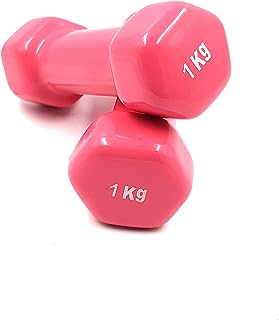

Product name:  Unisex Hexagon Rubber Vinyl Fixed Dumbbell - Pair Set Hand Weights for Strength Training - Weight Loss, Workout Bench, Gym... 
Product price:  6450.0
Product rating:  4.4


In [69]:
inv.printNext()

The top rated 5 product(s) are: 
1: 
Product image not available
Product name:  Hykes Heavy Pull Up Resistance Bands for Workout and Stretching for Home Workouts Exercise Bands Set Gym Sports Physiother... 
Product price:  1499.0
Product rating:  5.0
2: 


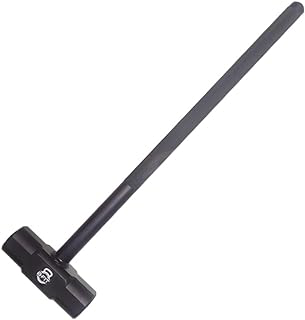

Product name:  B FIT Gym 2-16 Kg Hammer/Sledgehammer Functional Training Cross Fitness, Develop Stabilizer Muscles, Joints, and Core Stre... 
Product price:  7999.0
Product rating:  5.0
3: 
Product image not available
Product name:  YUVORA djustable Hand Grip Strengthener, Hand Gripper With Counter for Men & Women for Gym Workout Hand Exercise Equipment... 
Product price:  999.0
Product rating:  5.0
4: 


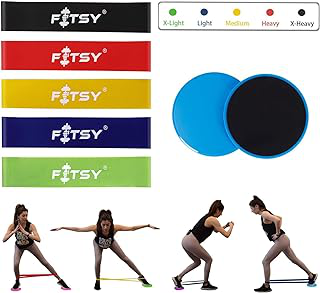

Product name:  FITSY® Core Resistance Training Set Includes - 5 Resistance Loop Bands Set and 2 Core Sliders Dual Sided Gliding Disc for ... 
Product price:  1499.0
Product rating:  5.0
5: 
Product image not available
Product name:  SIGNATRON Gymnastics Rings Wooden/Roman Rings with Adjustable Buckle & Straps for Exercise, Cross Fitness Functional Train... 
Product price:  3999.0
Product rating:  5.0


In [70]:
inv.printTopRated(5)

In [71]:
inv2 = myInventory()
inv2.read_file("Car Electronics.csv")

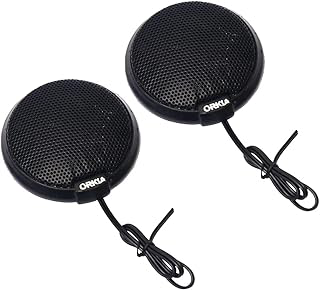

Product name:  Electronic Spices 2.75 Inch 4ω (Ohm) 400w Max Power Dome Tweeter Speaker 
Product price:  199.0
Product rating:  0


In [72]:
inv2.printNext()

In [73]:
new = inv + inv2


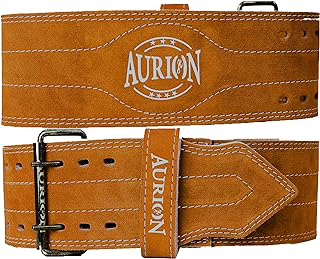

Product name:  Aurion Genuine Leather Pro Weight Lifting Belt, Durable Comfortable & Adjustable With Buckle, Stabilizing Lower Back Suppo... 
Product price:  899.0
Product rating:  4.4


In [77]:
new.printNext()

The top rated 10 product(s) are: 
1: 


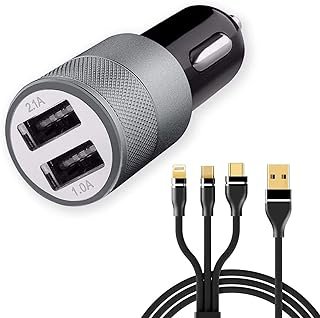

Product name:  GoSale 3.1 Amp Dual USB Port Car Charger for Tata Altroz EV Car Charger | High Speed Rapid Fast Turbo Metal Android & Tabl... 
Product price:  999.0
Product rating:  5.0
2: 


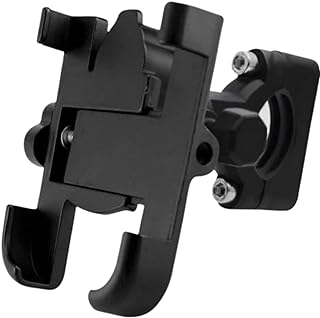

Product name:  CELLMASTER Metal Mobile Phone Holder for Bike Motorcycle Phone Holder Handlebar Phone Mount for Bike Cell Phone Stand 
Product price:  999.0
Product rating:  5.0
3: 


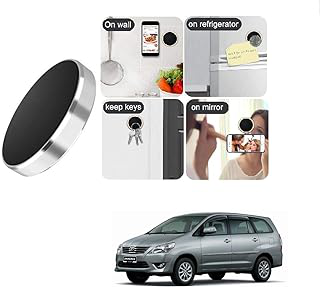

Product name:  Kozdiko Mini Magnetic Car Dashboard Mount Mobile Phone Holder with Metal Body for Toyota Innova 
Product price:  249.0
Product rating:  5.0
4: 


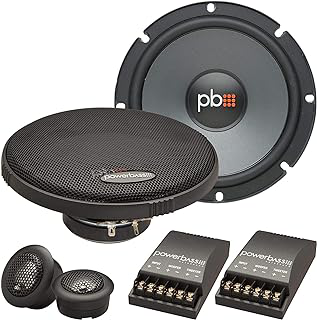

Product name:  PowerBass PB-650C-EI 600W 2-Way 6.5" Component Speakers 
Product price:  11990.0
Product rating:  5.0
5: 
Product image not available
Product name:  Walta Elite (WE) Panache1 3.4A Fast and Reliable Charging, 2USB Car Charger for All mobiles with Micro USB Cable (Black) 
Product price:  699.0
Product rating:  5.0
6: 


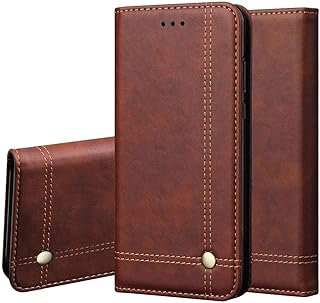

Product name:  Xusive Leather Case Wallet Slim Book Cover with Card Slots Cash Pocket Stand Holder Magnetic Flip Cover for Samsung Galaxy... 
Product price:  999.0
Product rating:  5.0
7: 
Product image not available
Product name:  WRENS Car X8 Fm Modulator Transmitter Hand Free Kit Dual USB C Interface Wireless Qc3.0 Car Fast Charger Car MP3 Player US... 
Product price:  999.0
Product rating:  5.0
8: 
Product image not available
Product name:  Viofo A129 Duo G Dual Channel Car DashCam Full HD Starvis Sensor Buffered Parking Mode Motion Detectoin 256GB MicroSD Supp... 
Product price:  23999.0
Product rating:  5.0
9: 


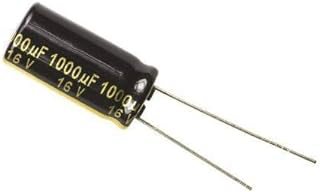

Product name:  1000uF/16V Electrolytic Capacitor - Pack Of 2 
Product price:  99.0
Product rating:  5.0
10: 


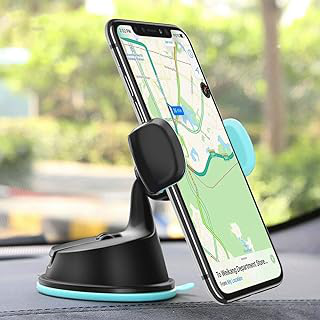

Product name:  Die Hard Dual Purpose 360-Degree Rotating Mobile Car Mount Holder Stand for Windscreen, Dashboard & Table Desk with Double... 
Product price:  1299.0
Product rating:  5.0


In [78]:
inv2.printTopRated(10)